# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [ ]:
df =pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.describe ()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.duplicated().sum()

np.int64(1)

### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.drop_duplicates(inplace=True)

## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


<Axes: xlabel='age', ylabel='Count'>

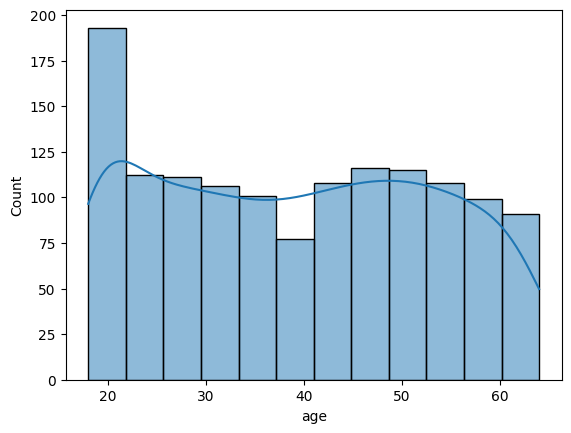

In [ ]:
sns.histplot(data = df,x='age',kde=True)

<Axes: xlabel='age'>

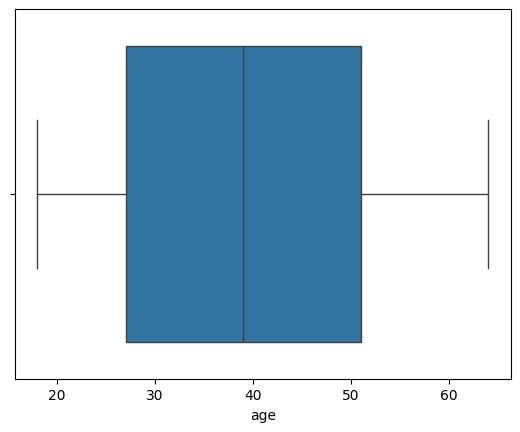

In [ ]:
sns.boxplot(data = df,x='age')

In [ ]:
df['age'].describe()

,age
count,1337.000000
mean,39.222139
std,14.044333
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
#Observations
#most data lie between 27 and 51
#mean is observed as 39.22
#Data is positively skewed

<Axes: xlabel='sex', ylabel='count'>

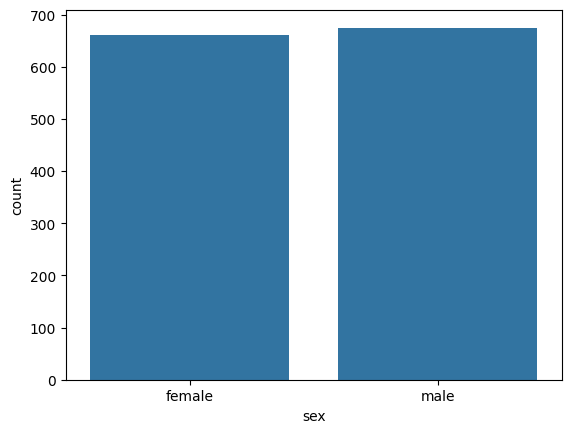

In [ ]:
sns.countplot(data = df,x='sex')

In [ ]:
df['sex'].describe()

,sex
count,1337
unique,2
top,male
freq,675


In [ ]:
#Observations
#frequency of male is higher than frequency of female
#Observed frequency difference between male and female is 13

<Axes: xlabel='bmi', ylabel='Count'>

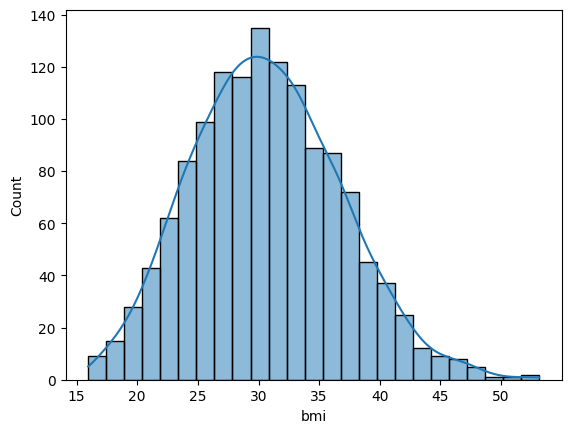

In [ ]:
sns.histplot(data = df,x='bmi',kde=True)

<Axes: xlabel='bmi'>

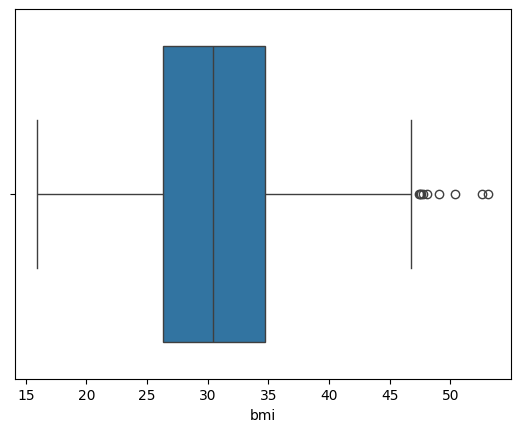

In [ ]:
sns.boxplot(data = df,x='bmi')

In [ ]:
df['bmi'].describe()

,bmi
count,1337.000000
mean,30.663452
std,6.100468
min,15.960000
25%,26.290000
50%,30.400000
75%,34.700000
max,53.130000


In [ ]:
#Observations
#most data lie between 26 to 34
#Data is positively skewed
#outliers are above 47 bmi

<Axes: xlabel='children', ylabel='Count'>

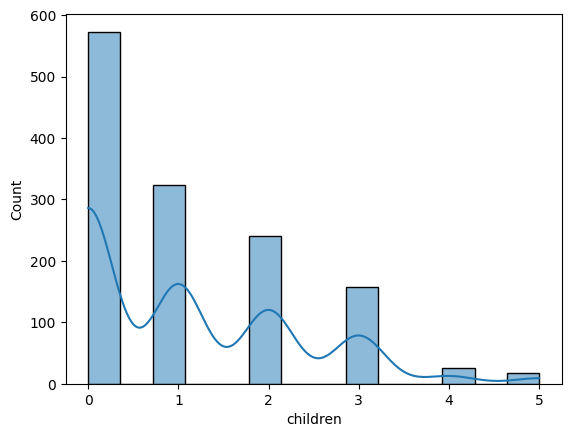

In [ ]:
sns.histplot(data = df,x='children',kde=True)

<Axes: xlabel='children'>

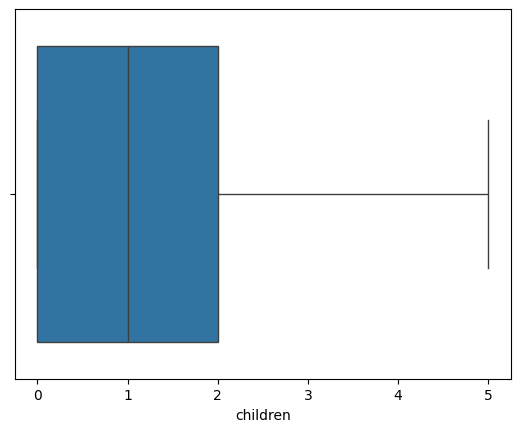

In [ ]:
sns.boxplot(data = df,x='children')

In [ ]:
df['children'].describe()

,children
count,1337.000000
mean,1.095737
std,1.205571
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [ ]:
#observations
#most data lie between 0 & 2
#Data is positivly skewed
#no children data has high count

<Axes: xlabel='smoker', ylabel='count'>

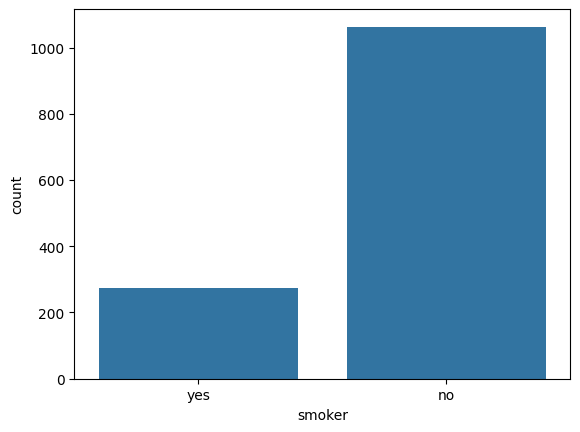

In [ ]:
sns.countplot(data = df,x='smoker')

In [ ]:
df['smoker'].describe()

,smoker
count,1337
unique,2
top,no
freq,1063


In [ ]:
#observations
#most of the data has no smokers
#count of smokers is very less with 274

<Axes: xlabel='region', ylabel='count'>

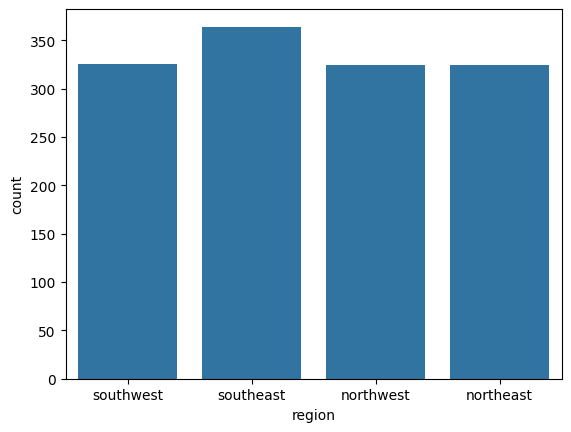

In [ ]:
sns.countplot(data = df,x='region')

In [ ]:
df['region'].describe()

,region
count,1337
unique,4
top,southeast
freq,364


In [ ]:
#observations
#south east is having high count with 364
#southwest,northwest, northeast have slightly similar count


<Axes: xlabel='charges', ylabel='Count'>

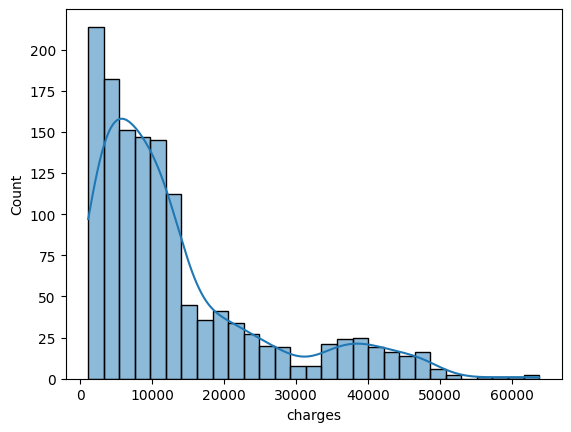

In [ ]:
sns.histplot(data = df,x='charges', kde=True)

<Axes: xlabel='charges'>

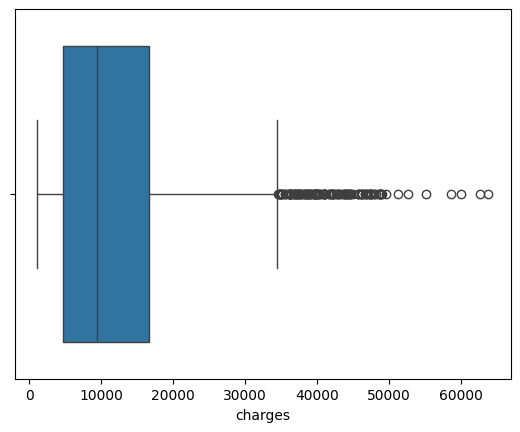

In [ ]:
sns.boxplot(data = df,x='charges')

In [ ]:
df['charges'].describe()

,charges
count,1337.000000
mean,13279.121487
std,12110.359656
min,1121.873900
25%,4746.344000
50%,9386.161300
75%,16657.717450
max,63770.428010


In [ ]:
#observations
#most data lie between 4746 to 16657
#mean of the data is observed as 1337
#outliers are above 35000
#data is positively skewed


### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

<Axes: xlabel='age', ylabel='charges'>

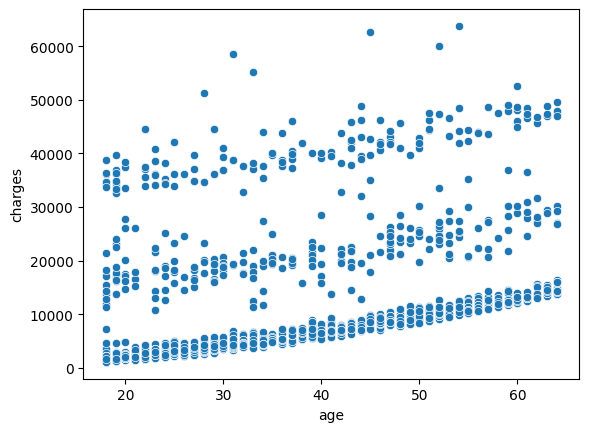

In [ ]:
sns.scatterplot(data = df,x='age',y='charges')

In [ ]:
#observations
#positive correlation is observed
#As the age is increasing the charges are increasing and overlapping
#There are few points with charges above 50000

<Axes: xlabel='sex', ylabel='charges'>

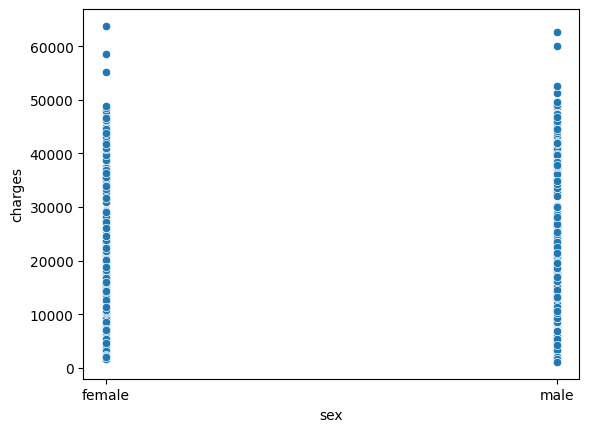

In [ ]:
sns.scatterplot(data=df,x='sex',y='charges')

In [ ]:
#observations
#positive correlation in both male and female
#highest charges are paid by female above 50000
#male pays higher charges than female

<Axes: xlabel='bmi', ylabel='charges'>

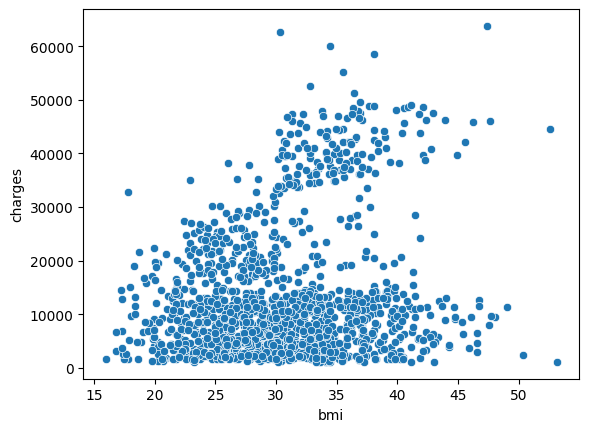

In [ ]:
sns.scatterplot(data=df,x='bmi',y='charges')

In [ ]:
#observations
#most data points lie between 20 and 35 bmi
#as bmi increases the people who pay charges are getting decreased

<Axes: xlabel='children', ylabel='charges'>

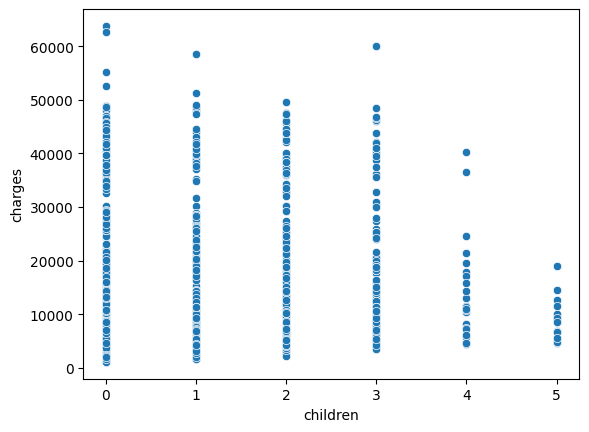

In [ ]:
sns.scatterplot(data=df,x='children',y='charges')

In [ ]:
#observations
#no children People are paying high charges
#People with more children are paying less charges

<Axes: xlabel='smoker', ylabel='charges'>

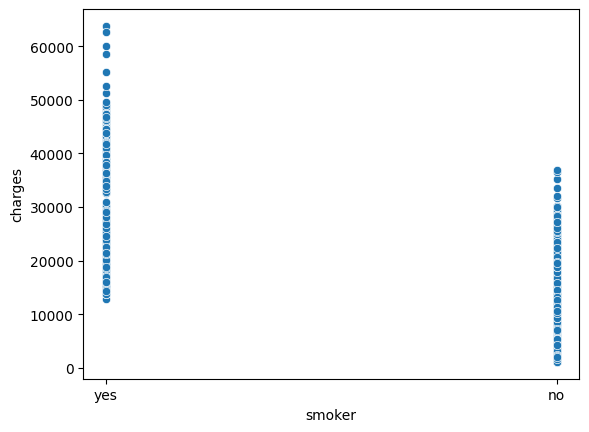

In [ ]:
sns.scatterplot(data=df,x='smoker',y='charges')

In [ ]:
#observations
#smokers are paying more charges than non smokers with greater than 60000 charges
# But non smokers are paying less than 40000

<Axes: xlabel='region', ylabel='charges'>

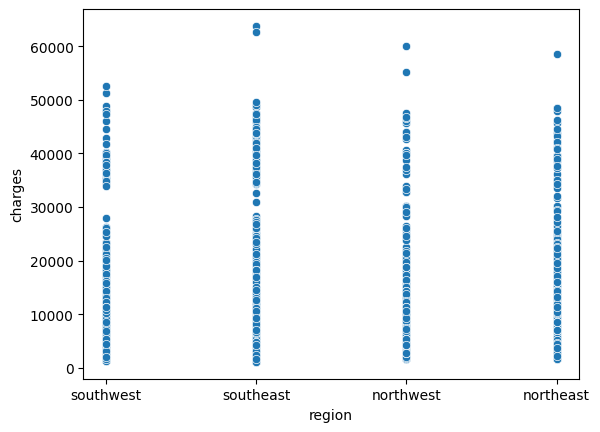

In [ ]:
sns.scatterplot(data=df,x='region',y='charges')

In [ ]:
#observations
#highest charges are paid by southeast region followed by,northwest, and northeast region
# lowest charges are paid by south west region

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

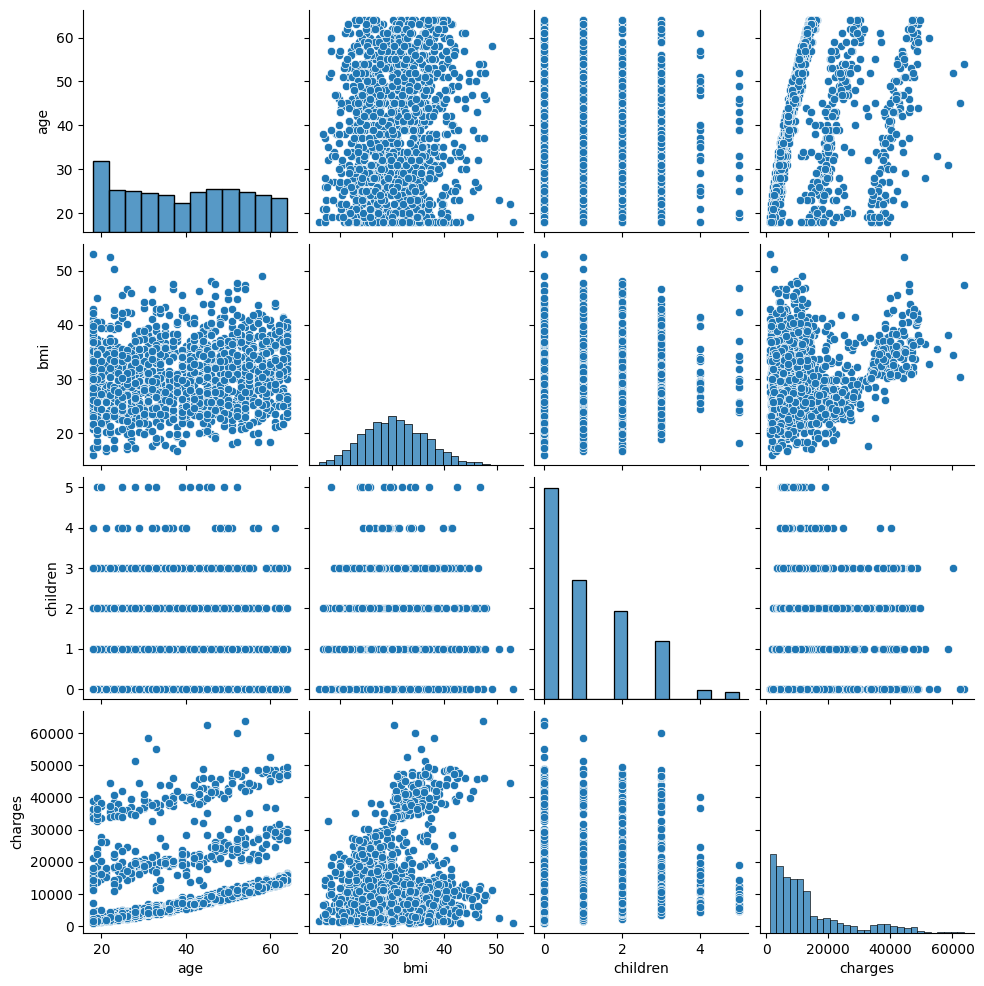

In [ ]:
sns.pairplot(data=df)

In [ ]:
#observations
#AGE : As age is increasing charges are increasing
#BMI : High charges for high bmi but above 40 lie as outliers
#CHILDREN : The charges paid by no children is high compared to charges paid with People having children
#CHARGES : As the charges increase there are less people to pay

### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

<Axes: >

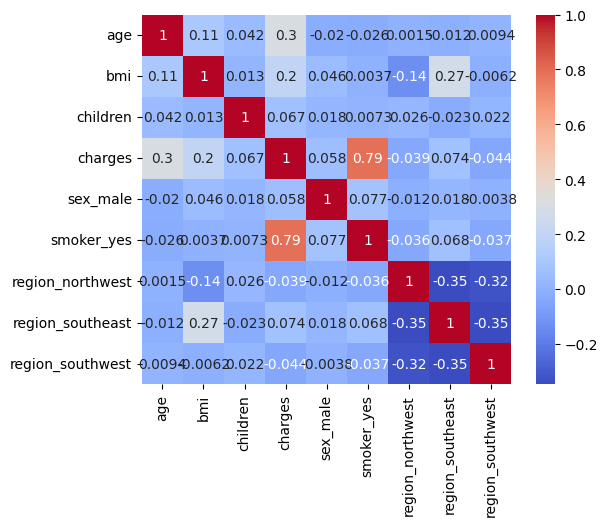

In [ ]:
# Convert categorical features ('sex', 'smoker', 'region') into numerical using one-hot encoding.
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Now calculate the correlation matrix on the encoded DataFrame.
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', square=True)

In [ ]:
#observations
#AGE : strong positive correlation at 0.3
#BMI : strong positive correlation at 0.27
#CHARGES : strong positive correlation at 0.3
#REGION  : strong positive correlation at 0.27

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder


# Drop duplicates from the original DataFrame
df.drop_duplicates(inplace=True)

# Reset the index after dropping duplicates - this will ensure consistent indices.
df = df.reset_index(drop=True)

# Define features (X) and target (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
categorical_features = ['sex', 'smoker', 'region']
encoded_features = encoder.fit_transform(X[categorical_features])

# Create a DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [ ]:
# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.7362637207024127, 0.7724363518631285)

In [ ]:
# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate performance metrics for both training and test sets
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

    # Test performance
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])

    # Training Performance - Calculate these metrics as well
mae_train = mean_absolute_error(y_train, y_train_pred)  # Calculate MAE for training set
mse_train = mean_squared_error(y_train, y_train_pred)  # Calculate MSE for training set
rmse_train = mse_train ** 0.5  # Calculate RMSE for training set
r2_train = r2_score(y_train, y_train_pred)  # Calculate R-squared for training set
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])  # Calculate Adjusted R-squared for training set

    # Now you can print the training performance
print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Training Performance:
Mean Absolute Error (MAE): $4165.83
Root Mean Squared Error (RMSE): $5984.39
R-squared (R²): 0.74
Adjusted R-squared (Adj. R²): 0.73

Test Performance:
Mean Absolute Error (MAE): $4181.82
Root Mean Squared Error (RMSE): $6240.21
R-squared (R²): 0.77
Adjusted R-squared (Adj. R²): 0.77


### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

Mean Absolute Error (MAE): Measures average magnitude of errors, est performance is high than train data

Root Mean Squared Error (RMSE): square root of mean squared error, test performance is high then train data

R-squared :Goodness of model
it can be more better fit than achieved one, also depending on the topic it can be strong fit

Adjusted R-squared : Adds only necessary data which is similar to R squared can provide better model


## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

All features are impacting the charges depending on usage lets obseve these findings:

AGE : As age is increasing charges are increasing

BMI : High charges for high bmi but above 40 lie as outliers

CHILDREN : The charges paid by no children is high compared to charges paid with People having children

CHARGES : As the charges increase there are less people to pay

REGION : High charges are paid in southeast region

SEX : Both male and female are paying high charges but male pays slightly high charges than female

SMOKER : Smokers are paying high charges than non smokers

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

learning rate can be introduced, regularization methods like rige and lasso can be used, also removing outliers can make model defect free.

Improvements can be done using Gradient descent method for better accuracy in the model.

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 60**

---